In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['axes.unicode_minus'] = False

lotto = pd.read_csv('lotto.csv')

### 1.
- 연관규칙 분석을 위해 lotto 데이터를 transaction 데이터로 변환. 추첨된 순서는 고려하지 않음. 변환된 데이터에서 가장 많이 등장한 상위 10개의 로또번호를 막대그래프로 출력 후 설명

In [3]:
from pandas import DataFrame
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

# 트랜잭션 생성을 위해 로또번호만 추출한다.
transactions = lotto.iloc[:,1:].values

# 이항값으로 구성되는 트랜잭션 테이블을 생성한다.
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_).map(lambda x: 1 if x else 0)

# 빈발집합을 생성한다.
fset = apriori(df, min_support=0.01, use_colnames=True, verbose=0)

# 지지도만 표현되고 빈도가 표현되지 않으므로 빈도데이터를 생성한다.
def itemsetFrequency(itemset):
    set = list(itemset)
    count = 0
    for item in set:
        count += df[item].sum()
    return count

fset['frequency'] = fset.itemsets.apply(lambda x : itemsetFrequency(x))

c:\Users\krkim1\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


<Axes: xlabel='itemsets'>

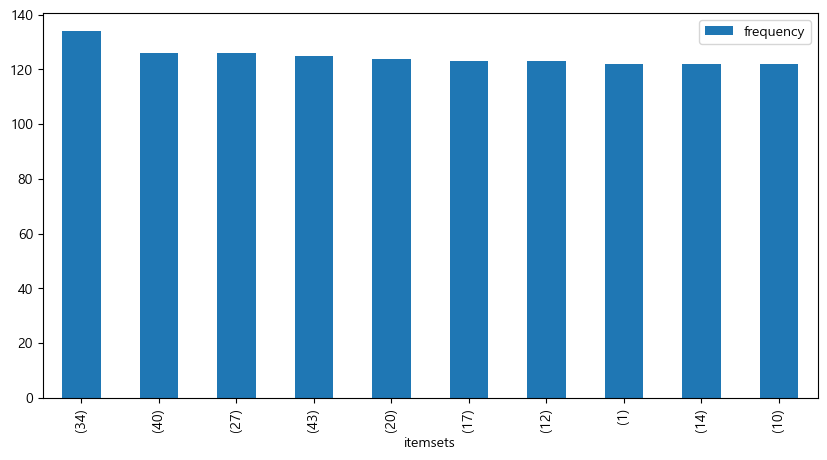

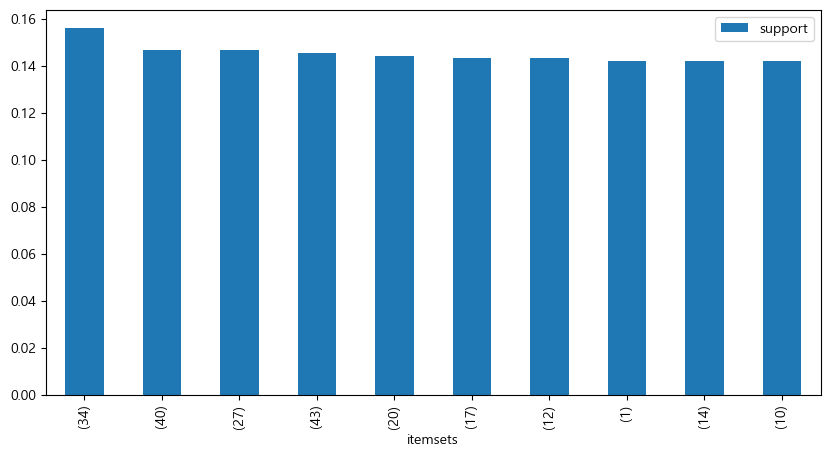

In [4]:
# 가장 빈도가 높은 상위 10개 수의 지지도와 빈도를 바그래프로 표현한다.
fset_sort = fset.sort_values(by='support', ascending=False)
fset_sort.head(10).plot(kind='bar', x='itemsets', y='frequency')
fset_sort.head(10).plot(kind='bar', x='itemsets', y='support')


### 2.
- aprior 함수를 사용하여 다음 조건에 따라 연관규칙을 생성하고, 이를 rule_1 이라는 변수에 저장하여 결과를 해석하시오.
    - 최소 지지도 : 0.002
    - 최소 신뢰도 : 0.8
    - 최소 조합 항목수 2
    - 최대 조합 항목수 6
- 도출된 연관규칙들을 향상도 기준으로 내림차순 정렬하여, 상위 30개의 규칙을 확인, 데이터프레임으로 변환, CSV파일로 저장

In [5]:
from mlxtend.frequent_patterns import association_rules

# 빈발집합을 생성한다.
fset = apriori(df, min_support=0.002, max_len=6, use_colnames=True, verbose=0)

rule_1 = association_rules(fset, num_itemsets=1, metric='confidence', min_threshold=0.8).sort_values(by='lift', ascending=False)
rule_1 = rule_1[rule_1.confidence > 0.8]
rule_1

c:\Users\krkim1\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
703,"(16, 26, 31)","(43, 36)",0.002328,0.012806,0.002328,1.0,78.090909,1.0,0.002298,inf,0.989498,0.181818,1.0,0.590909
643,"(24, 34, 22)","(31, 7)",0.002328,0.012806,0.002328,1.0,78.090909,1.0,0.002298,inf,0.989498,0.181818,1.0,0.590909
642,"(34, 31, 7)","(24, 22)",0.002328,0.012806,0.002328,1.0,78.090909,1.0,0.002298,inf,0.989498,0.181818,1.0,0.590909
682,"(26, 21, 14)","(18, 15)",0.002328,0.013970,0.002328,1.0,71.583333,1.0,0.002296,inf,0.988331,0.166667,1.0,0.583333
652,"(34, 10, 36)","(44, 22)",0.002328,0.013970,0.002328,1.0,71.583333,1.0,0.002296,inf,0.988331,0.166667,1.0,0.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,"(10, 36, 44, 22)",(34),0.002328,0.155995,0.002328,1.0,6.410448,1.0,0.001965,inf,0.845974,0.014925,1.0,0.507463
282,"(24, 31, 7)",(34),0.002328,0.155995,0.002328,1.0,6.410448,1.0,0.001965,inf,0.845974,0.014925,1.0,0.507463
192,"(5, 29, 13)",(34),0.002328,0.155995,0.002328,1.0,6.410448,1.0,0.001965,inf,0.845974,0.014925,1.0,0.507463
603,"(42, 45, 23)",(34),0.002328,0.155995,0.002328,1.0,6.410448,1.0,0.001965,inf,0.845974,0.014925,1.0,0.507463


In [7]:
rule_1.head(30).to_csv("rule_1.csv")

### 3.
- rule_1에 대한 정보를 해석하고, 1)번 문제를 통해 알아낸 가장 많이 추첨된 번호가 우측항에 존재하는는 규칙들 만을 'rules_most_freq'라는 변수에 저장하시오. 그리고 해당 규칙들을 해석하여 인사이틀르 도출, 서술하시오.

In [64]:
freq_vals = fset_sort.iloc[0,:].itemsets
rules_most_freq = rule_1[rule_1.consequents == freq_vals]

rules_most_freq

# 해석
# 총 19개의 규칙이 도출되었으며, 1번 규칙을 확인해보면, [17, 42, 45]번과 34가 함께 추첨될 확률은 support가 0.002328로 약 0.2%에 해당한다. 
# 이 규칙의 향상도는 6.410448로, 이는 34만 추첨된 경우보다 [17, 42, 45]번이 뽑히고 34가 뽑힐 확률이 약 6배 가량 높다는 것을 의미한다.
# 하지만 이 규칙은 순서를 고려하지 않은, 조합에 따른 규칙이므로 향상도가 높다고 해서 추첨번호일 확률로 사용할 수는 없다.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
542,"(17, 42, 45)",(34),0.002328,0.155995,0.002328,1.0,6.410448,1.0,0.001965,inf,0.845974,0.014925,1.0,0.507463
693,"(19, 44, 21, 15)",(34),0.002328,0.155995,0.002328,1.0,6.410448,1.0,0.001965,inf,0.845974,0.014925,1.0,0.507463
50,"(2, 4, 31)",(34),0.003492,0.155995,0.003492,1.0,6.410448,1.0,0.002948,inf,0.846963,0.022388,1.0,0.511194
471,"(25, 44, 14)",(34),0.002328,0.155995,0.002328,1.0,6.410448,1.0,0.001965,inf,0.845974,0.014925,1.0,0.507463
486,"(41, 19, 15)",(34),0.002328,0.155995,0.002328,1.0,6.410448,1.0,0.001965,inf,0.845974,0.014925,1.0,0.507463
579,"(24, 22, 31)",(34),0.002328,0.155995,0.002328,1.0,6.410448,1.0,0.001965,inf,0.845974,0.014925,1.0,0.507463
8,"(1, 5, 13)",(34),0.002328,0.155995,0.002328,1.0,6.410448,1.0,0.001965,inf,0.845974,0.014925,1.0,0.507463
68,"(2, 21, 15)",(34),0.002328,0.155995,0.002328,1.0,6.410448,1.0,0.001965,inf,0.845974,0.014925,1.0,0.507463
72,"(2, 28, 15)",(34),0.002328,0.155995,0.002328,1.0,6.410448,1.0,0.001965,inf,0.845974,0.014925,1.0,0.507463
539,"(32, 17, 33)",(34),0.003492,0.155995,0.003492,1.0,6.410448,1.0,0.002948,inf,0.846963,0.022388,1.0,0.511194


# 2. 통계분석
### 1.
- FIFA 데이터에서 각 선수의 키는 Height변수에 피트와 인치로 입력되어 있는데, cm으로 변환하여 새로운 변수 Height_cm을 생성하시오.

In [ ]:
fifa = pd.read_csv('fifa.csv', encoding='euc-kr')
temp_series = fifa.Height.str.split('\'')
fifa['Height_cm'] = temp_series.apply(lambda x: int(x[0])*30 + int(x[1])*2.5)

### 2.
- 포지션을 의미하는 Position 변수를 아래 표를 참고하여 Forward, Midfielder, Defender, GoalKeeper로 재범주화하고 factor형으로 변환하여 Position_Class라는 변수를 생성하고 저장하시오.

In [ ]:
def classify(pos):
    if pos in ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW']:
        return 'Forward'
    elif pos in ['LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM']:
        return 'Midfielder'
    elif pos in ['LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']:
        return 'Defender'
    elif pos == 'GK':
        return 'GoalKeeper'
    else:
        return np.nan

fifa['Position_Class'] = fifa.Position.apply(lambda x: classify(x))
fifa.info()

### 3.
- Position_class 변수의 범주에 따른 Value 변수 평균값의 차이를 비교하는 일원배치 분산분석을 수행하고 결과를 해석하시오. (등분산성 가정 만족한다고 가정)
- 평균값의 차이가 통계적으로 유의하다면 사후검정을 수행하고 설명하시오.

In [85]:
data = fifa[['Position_Class', 'Value']]
data

,Position_Class,Value
0,Forward,110500
1,Forward,77000
2,Forward,118500
3,GoalKeeper,72000
4,Midfielder,102000
...,...,...
16637,Midfielder,60
16638,Forward,60
16639,Forward,60
16640,Forward,60


In [ ]:
# 분산분석 수행
from statsmodels.stats.oneway import anova_oneway
oa = anova_oneway(data=data.Value, groups=data.Position_Class, use_var='equal')
print(' stat: {:.3f}, p-value: {:.3f}'.format(oa.statistic, oa.pvalue))

# 귀무가설 : 포지션에 따른 평균의 차이는 없다.
# 대립가설 : 포지션에 따른 평균의 차이가 있다.
# 위 분석결과에 따라 유의수준 0.01에서 귀무가설이 지지되지 않는다. 즉 평균의 차이가 있다고 볼 수 있다.

 stat: 41.874, p-value: 0.000


        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
  group1     group2    meandiff  p-adj    lower      upper   reject
-------------------------------------------------------------------
  Defender    Forward    930.373    0.0   610.7412 1250.0048   True
  Defender GoalKeeper  -507.3848 0.0034  -887.6281 -127.1415   True
  Defender Midfielder   760.8787    0.0   486.7109 1035.0465   True
   Forward GoalKeeper -1437.7579    0.0 -1865.9257  -1009.59   True
   Forward Midfielder  -169.4944 0.5691  -507.0009  168.0122  False
GoalKeeper Midfielder  1268.2635    0.0   872.8761 1663.6509   True
-------------------------------------------------------------------


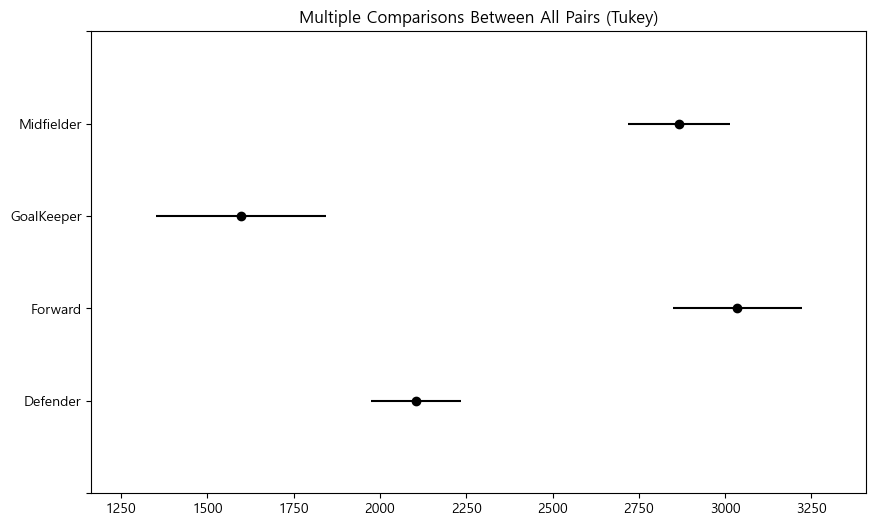

In [ ]:
from statsmodels.sandbox.stats.multicomp import MultiComparison
from scipy.stats import ttest_ind

mc = MultiComparison(data=data.Value, groups=data.Position_Class).tukeyhsd(alpha=0.05)
print(mc)

mc.plot_simultaneous()
plt.show()

# Forward와 MidFielder는 평균의 차이가 유의미하지 않지만, 나머지 모든 조합에서 평균의 차이가 있다.

### 4.
- Preferred Foot과 Position_Class 변수에 따라 Value의 차이가 있는지를 알아보기 위해, 이원배치 분산분석을 수행하고, 결과를 해석하시오.

In [91]:
from pandas import crosstab
print(' 데이터 확인\n ', crosstab(fifa.Preferred_Foot, fifa.Position_Class, fifa.Value, aggfunc=list))

 데이터 확인
  Position_Class                                           Defender  \
Preferred_Foot                                                      
Left            [27000, 43000, 57000, 38000, 34000, 36500, 380...   
Right           [51000, 44000, 63000, 51500, 59500, 46000, 240...   

Position_Class                                            Forward  \
Preferred_Foot                                                      
Left            [110500, 89000, 60000, 62500, 61000, 59500, 54...   
Right           [77000, 118500, 93000, 80000, 77000, 83500, 60...   

Position_Class                                         GoalKeeper  \
Preferred_Foot                                                      
Left            [53500, 36000, 41500, 25000, 25000, 24000, 155...   
Right           [72000, 68000, 58000, 38000, 30000, 4000, 3050...   

Position_Class                                         Midfielder  
Preferred_Foot                                                     
Left            [60000,

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols('Value~C(Preferred_Foot)+C(Position_Class)+C(Preferred_Foot):C(Position_Class)', data=fifa).fit()
atable = anova_lm(model)
print(atable)

# Preferred_Foot에 따른 Value차이, Position_Class에 따른 Value, 둘의 교호작용에 따른 차이 모두 유효하다.

                                          df        sum_sq       mean_sq  \
C(Preferred_Foot)                        1.0  1.460850e+08  1.460850e+08   
C(Position_Class)                        3.0  4.087367e+09  1.362456e+09   
C(Preferred_Foot):C(Position_Class)      3.0  4.736156e+08  1.578719e+08   
Residual                             16634.0  5.399071e+11  3.245805e+07   

                                             F        PR(>F)  
C(Preferred_Foot)                     4.500734  3.389505e-02  
C(Position_Class)                    41.975902  5.151392e-27  
C(Preferred_Foot):C(Position_Class)   4.863874  2.207249e-03  
Residual                                   NaN           NaN  


### 5.
- Age, Overall, Wage, Height_cm, Weight_lb가 Value에 미치는 영향을 알아보는 회귀분석을 단게적 선택법을 사용하여 수행하고 결과를 해석하시오.

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from itertools import combinations
import statsmodels.api as sm

X = fifa[['Age', 'Overall', 'Wage', 'Height_cm', 'Weight_lb']]
y = fifa.Value

sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test  = train_test_split(X, y)

def stepwise_method_AIC(X, y):
    result = pd.DataFrame()
    feature_combis=[]
    for i in range(1,len(X.columns)+1):
        feature_combis += list(combinations(X.columns, i))
    feature_combis.reverse()

    for j, combi in enumerate(feature_combis):
        X_= X.filter(combi)
        X_=sm.add_constant(X_)
        model = sm.OLS(y, X_)
        fitted = model.fit()

        n = fitted.nobs
        p = fitted.df_model
        if j==0:
            MSE_full = fitted.mse_resid

        result.loc[j, 'feature_combi'] = ', '.join(list(fitted.params.keys()))
        result.loc[j, 'AIC'] = fitted.aic

        result = result.sort_values(by='AIC', ascending=True)
        best = result.iloc[0, 0]

    return best, result


In [101]:
best, result = stepwise_method_AIC(X, y)

print('최적 변수조합: ', best)
print(result)

최적 변수조합:  const, Age, Overall, Wage, Height_cm
                                      feature_combi            AIC
5              const, Age, Overall, Wage, Height_cm  309167.661528
4              const, Age, Overall, Wage, Weight_lb  309167.876219
0   const, Age, Overall, Wage, Height_cm, Weight_lb  309168.757168
15                        const, Age, Overall, Wage  309173.169187
1        const, Overall, Wage, Height_cm, Weight_lb  310695.685312
8                   const, Overall, Wage, Weight_lb  310700.696941
9                   const, Overall, Wage, Height_cm  310762.788456
21                             const, Overall, Wage  310792.412853
2            const, Age, Wage, Height_cm, Weight_lb  312447.893664
12                      const, Age, Wage, Height_cm  312456.155941
24                                 const, Age, Wage  312462.323216
11                      const, Age, Wage, Weight_lb  312464.316088
18                           const, Wage, Height_cm  312623.214904
6              

In [104]:
X = fifa[['Age', 'Overall', 'Wage', 'Height_cm']]
y = fifa.Value

X_ = sm.add_constant(X)
model = sm.OLS(y, X_)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                 1.572e+04
Date:                Tue, 26 Aug 2025   Prob (F-statistic):               0.00
Time:                        22:52:33   Log-Likelihood:            -1.5458e+05
No. Observations:               16642   AIC:                         3.092e+05
Df Residuals:                   16637   BIC:                         3.092e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8690.8178    588.280    -14.773      0.000   -9843.908   -7537.727
Age         -202.1603      4.938    -40.936      0.000    -211.840    -192.480
Overall      241.3450      4.002     60.310      0.000     233.501     249.189
Wage         184.1837      1.128    163.317      0.000     181.973     186.394
Height_cm     -8.4446      3.082     -2.740      0.006     -14.486      -2.403
==============================================================================
Omnibus:                    17089.038   Durbin-Watson:                   1.407
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3525378.426
Skew:                           4.665   Prob(JB):                         0.00
Kurtosis:                      73.690   Cond. No.                     5.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""